In [1]:
# Load pyspark, pandas
import findspark
findspark.init()        # spark를 못 찾아서 사용

from pyspark import SparkConf, SparkContext
import pandas as pd

In [2]:
# Configure Spark
conf = SparkConf().setMaster("local").setAppName("assignment-companies-trips")     # mastr 클러스터 마스터의 정보   appName은 애플리케이션의 이름  (두 설정 필수)
sc = SparkContext(conf = conf)                                                 # ex) local[2], local[*] 스레드 개수. 기본은 단일 스레드

In [3]:
# Dataset sample
filename = "fhvhv_tripdata_2020-03_short.csv"   # 샘플 데이터

In [4]:
# Data parsing
file_rdd = sc.textFile("./data/" + filename)     # 파일 rdd로 읽어오기   csv -> rdd

header = file_rdd.first()    
filtered_lines = file_rdd.filter(lambda row:row != header) # all lines excepting the header
companies = filtered_lines.map(lambda row:row.split(",")[0])  # 행을 ","로 분리하고 분리한 것들 중 [0]번째 인덱스에 해당하는 부분
result = companies.countByValue()     # 1,1,2,2,2,3,3,3,3  -> 1:2개, 2:3게, 3:4개 이런식으로 계산해줌
result

defaultdict(int, {'HV0005': 1176143, 'HV0003': 3537637, 'HV0004': 147216})

In [5]:
# save results as a csv file
trips = pd.Series(result, name = "trips").to_csv("./data/trips_companies.csv")

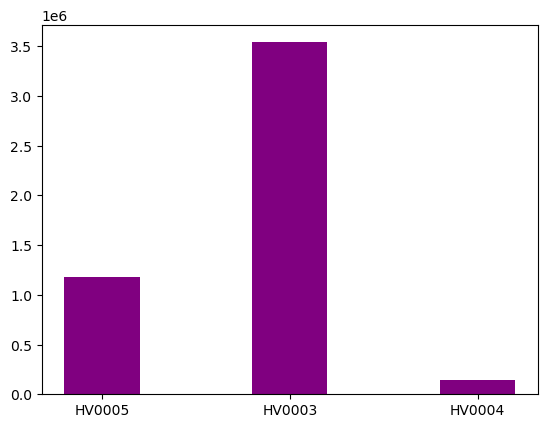

In [6]:
# Visulalize the results
import matplotlib.pyplot as plt

trips = pd.read_csv("./data/trips_companies.csv")

list_x = trips.iloc[:, 0]     # X축
list_y = trips.iloc[:, 1]     # Y축 

plt.bar(list_x, list_y, width = 0.4, color = 'Purple')    # 막대 그래프가 더 보기 편한 듯
plt.show()